# Fake News Detection

In [109]:
pwd

'C:\\Users\\Shamitha'

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
import re
import string
import pickle

In [111]:
df_fake = pd.read_csv("E:\\isfcr project\\Fake.csv")
df_true = pd.read_csv("E:\\isfcr project\\True.csv")

In [112]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23444,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23445,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23446,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23447,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [113]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [114]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [115]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [116]:
df_fake["real/fake"] = "Fake"
df_true["real/fake"] = "Real"

In [117]:
df_fake.shape, df_true.shape

((23449, 5), (21417, 5))

In [118]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23448, 23438, -1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416, 21406, -1):
    df_true.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
#inplace=true coz v do not want another dataset to be returned, axis=0=>along a row

In [119]:
df_fake.shape, df_true.shape

((23439, 5), (21407, 5))

In [120]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("E:\\isfcr project\\manual_testing.csv")
#axis=0 indicates concatenation along series or rows

In [121]:
df_merge = pd.concat([df_fake, df_true], axis = 0)
df_merge.head(10)

,title,text,subject,date,real/fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",Fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",Fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",Fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",Fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",Fake


In [122]:
df = df_merge.sample(frac = 1)
#sample() is a function from pandas, used to generate sample random row or column from the function(to shuffle)
#frac indicates the length of dataframe values to be returned , 1 indicates to return all values

In [123]:
df.head(10)

,title,text,subject,date,real/fake
6424,Trump to Republicans: Act swiftly to replace O...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"January 10, 2017",Real
11063,BOOM! WATCH SEAN HANNITY Hit Back At Bogus Sex...,Thank you Sean Hannity for hitting back at the...,politics,"Apr 24, 2017",Fake
11112,Senator Markey places hold on Obama's nominee ...,(Reuters) - Democratic U.S. Senator Edward Mar...,politicsNews,"January 25, 2016",Real
13875,French minister believes banks had 'good reaso...,PARIS (Reuters) - French Finance Minister Brun...,worldnews,"November 25, 2017",Real
15532,"Saudi-led forces close air, sea and land acces...",DUBAI (Reuters) - The Saudi-led military coali...,worldnews,"November 6, 2017",Real
13814,Honduras president with strong lead in TV stat...,TEGUCIGALPA (Reuters) - An exit poll by a Hond...,worldnews,"November 27, 2017",Real
6238,U.S. Supreme Court justices fret over offensiv...,WASHINGTON (Reuters) - Supreme Court justices ...,politicsNews,"January 18, 2017",Real
5709,U.S. watchdog agency to review implementation ...,WASHINGTON (Reuters) - A watchdog agency at th...,politicsNews,"February 2, 2017",Real
4606,U.S. to review energy royalty rates on federal...,WASHINGTON (Reuters) - The U.S. Interior Depar...,politicsNews,"March 29, 2017",Real
19241,INSANE ANTI-TRUMP PROTESTER Lights Trump Suppo...,The Inauguration was a beautiful day full of g...,left-news,"Jan 23, 2017",Fake


In [124]:
df

,title,text,subject,date,real/fake
6424,Trump to Republicans: Act swiftly to replace O...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"January 10, 2017",Real
11063,BOOM! WATCH SEAN HANNITY Hit Back At Bogus Sex...,Thank you Sean Hannity for hitting back at the...,politics,"Apr 24, 2017",Fake
11112,Senator Markey places hold on Obama's nominee ...,(Reuters) - Democratic U.S. Senator Edward Mar...,politicsNews,"January 25, 2016",Real
13875,French minister believes banks had 'good reaso...,PARIS (Reuters) - French Finance Minister Brun...,worldnews,"November 25, 2017",Real
15532,"Saudi-led forces close air, sea and land acces...",DUBAI (Reuters) - The Saudi-led military coali...,worldnews,"November 6, 2017",Real
...,...,...,...,...,...
19579,BOOM! LIBERAL COLUMNIST Gets DESTROYED By Tuck...,,left-news,"Nov 18, 2016",Fake
15991,"Britain accelerates Brexit plans, divorce talk...",LONDON/BRATISLAVA (Reuters) - Britain is accel...,worldnews,"October 31, 2017",Real
20653,Three vehicles torched in long-running South A...,JOHANNESBURG (Reuters) - One Uber vehicle and ...,worldnews,"September 8, 2017",Real
13101,HILLARY’S STATE DEPARTMENT DESTROYED 13 Of Her...,I thought it would be easier to carry just on...,politics,"Sep 3, 2016",Fake


In [125]:
df.shape

(44846, 5)

In [126]:
df.isnull().sum()

title        0
text         0
subject      0
date         0
real/fake    0
dtype: int64

In [127]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text
#to remove unusual and irregular expressions in the text column
#sub is an built-in library to replace substring with another substring

In [128]:
df["text"] = df["text"].apply(word_drop)

In [129]:
df.head(100)

,title,text,subject,date,real/fake
6424,Trump to Republicans: Act swiftly to replace O...,washington reuters u s president elect do...,politicsNews,"January 10, 2017",Real
11063,BOOM! WATCH SEAN HANNITY Hit Back At Bogus Sex...,thank you sean hannity for hitting back at the...,politics,"Apr 24, 2017",Fake
11112,Senator Markey places hold on Obama's nominee ...,reuters democratic u s senator edward mar...,politicsNews,"January 25, 2016",Real
13875,French minister believes banks had 'good reaso...,paris reuters french finance minister brun...,worldnews,"November 25, 2017",Real
15532,"Saudi-led forces close air, sea and land acces...",dubai reuters the saudi led military coali...,worldnews,"November 6, 2017",Real
...,...,...,...,...,...
8571,Glenn Beck Endorses Ted Cruz In A Series Of B...,it s a bromance for the ages one that may go ...,News,"January 23, 2016",Fake
8376,Elizabeth Warren Has Some News As To Who She’...,if there s one person who is loved by all in t...,News,"February 2, 2016",Fake
5063,"Two Muslim Men Shot To Death In Queens, Local...",two muslim men were shot to death in broad day...,News,"August 13, 2016",Fake
10201,WHY THE HUGE 1.1 MILLION DROP in Food Stamp En...,over million people have dropped off of the f...,politics,"Aug 8, 2017",Fake


In [130]:
df.shape

(44846, 5)

In [131]:
def word(subject):
    subject = subject.lower()
    return subject
#converts all data in column subject to lowercase

In [132]:
df["subject"] = df["subject"].apply(word)

In [133]:
df.head(10)

,title,text,subject,date,real/fake
6424,Trump to Republicans: Act swiftly to replace O...,washington reuters u s president elect do...,politicsnews,"January 10, 2017",Real
11063,BOOM! WATCH SEAN HANNITY Hit Back At Bogus Sex...,thank you sean hannity for hitting back at the...,politics,"Apr 24, 2017",Fake
11112,Senator Markey places hold on Obama's nominee ...,reuters democratic u s senator edward mar...,politicsnews,"January 25, 2016",Real
13875,French minister believes banks had 'good reaso...,paris reuters french finance minister brun...,worldnews,"November 25, 2017",Real
15532,"Saudi-led forces close air, sea and land acces...",dubai reuters the saudi led military coali...,worldnews,"November 6, 2017",Real
13814,Honduras president with strong lead in TV stat...,tegucigalpa reuters an exit poll by a hond...,worldnews,"November 27, 2017",Real
6238,U.S. Supreme Court justices fret over offensiv...,washington reuters supreme court justices ...,politicsnews,"January 18, 2017",Real
5709,U.S. watchdog agency to review implementation ...,washington reuters a watchdog agency at th...,politicsnews,"February 2, 2017",Real
4606,U.S. to review energy royalty rates on federal...,washington reuters the u s interior depar...,politicsnews,"March 29, 2017",Real
19241,INSANE ANTI-TRUMP PROTESTER Lights Trump Suppo...,the inauguration was a beautiful day full of g...,left-news,"Jan 23, 2017",Fake


In [134]:
df.shape

(44846, 5)

In [135]:
df.isnull().sum()

title        0
text         0
subject      0
date         0
real/fake    0
dtype: int64

In [136]:
df = df.drop_duplicates(subset = ['text','title','date'], keep = 'last').reset_index(drop = True)
#when drop=false(default value) a new dataframe is returned
#keep=last indicates that while dropping the duplicates last one is kept
#function of pandas

In [137]:
df

,title,text,subject,date,real/fake
0,Trump to Republicans: Act swiftly to replace O...,washington reuters u s president elect do...,politicsnews,"January 10, 2017",Real
1,Senator Markey places hold on Obama's nominee ...,reuters democratic u s senator edward mar...,politicsnews,"January 25, 2016",Real
2,French minister believes banks had 'good reaso...,paris reuters french finance minister brun...,worldnews,"November 25, 2017",Real
3,"Saudi-led forces close air, sea and land acces...",dubai reuters the saudi led military coali...,worldnews,"November 6, 2017",Real
4,Honduras president with strong lead in TV stat...,tegucigalpa reuters an exit poll by a hond...,worldnews,"November 27, 2017",Real
...,...,...,...,...,...
38824,BOOM! LIBERAL COLUMNIST Gets DESTROYED By Tuck...,,left-news,"Nov 18, 2016",Fake
38825,"Britain accelerates Brexit plans, divorce talk...",london bratislava reuters britain is accel...,worldnews,"October 31, 2017",Real
38826,Three vehicles torched in long-running South A...,johannesburg reuters one uber vehicle and ...,worldnews,"September 8, 2017",Real
38827,HILLARY’S STATE DEPARTMENT DESTROYED 13 Of Her...,i thought it would be easier to carry just on...,politics,"Sep 3, 2016",Fake


In [138]:
df.shape

(38829, 5)

In [139]:
df["date"]=df.date.str.replace(' ','-')

In [140]:
df.head(10)

,title,text,subject,date,real/fake
0,Trump to Republicans: Act swiftly to replace O...,washington reuters u s president elect do...,politicsnews,"January-10,-2017-",Real
1,Senator Markey places hold on Obama's nominee ...,reuters democratic u s senator edward mar...,politicsnews,"January-25,-2016-",Real
2,French minister believes banks had 'good reaso...,paris reuters french finance minister brun...,worldnews,"November-25,-2017-",Real
3,"Saudi-led forces close air, sea and land acces...",dubai reuters the saudi led military coali...,worldnews,"November-6,-2017-",Real
4,Honduras president with strong lead in TV stat...,tegucigalpa reuters an exit poll by a hond...,worldnews,"November-27,-2017-",Real
5,U.S. Supreme Court justices fret over offensiv...,washington reuters supreme court justices ...,politicsnews,"January-18,-2017-",Real
6,U.S. watchdog agency to review implementation ...,washington reuters a watchdog agency at th...,politicsnews,"February-2,-2017-",Real
7,U.S. to review energy royalty rates on federal...,washington reuters the u s interior depar...,politicsnews,"March-29,-2017-",Real
8,Coretta Scott King Wrote A Letter Opposing Je...,this is how far republicans will go to protect...,news,"January-10,-2017",Fake
9,Republicans BETRAY Paul Ryan And Mitch McConn...,many republicans in congressional leadership a...,news,"January-10,-2017",Fake


In [141]:
df["date"]=df.date.str.replace(',','')

In [142]:
df.head(100)

,title,text,subject,date,real/fake
0,Trump to Republicans: Act swiftly to replace O...,washington reuters u s president elect do...,politicsnews,January-10-2017-,Real
1,Senator Markey places hold on Obama's nominee ...,reuters democratic u s senator edward mar...,politicsnews,January-25-2016-,Real
2,French minister believes banks had 'good reaso...,paris reuters french finance minister brun...,worldnews,November-25-2017-,Real
3,"Saudi-led forces close air, sea and land acces...",dubai reuters the saudi led military coali...,worldnews,November-6-2017-,Real
4,Honduras president with strong lead in TV stat...,tegucigalpa reuters an exit poll by a hond...,worldnews,November-27-2017-,Real
...,...,...,...,...,...
95,"In Illinois, partisan politics send budget bat...",chicago reuters any hope for a break in il...,politicsnews,May-31-2017-,Real
96,A majority of adults disagree with Trump on fi...,new york reuters a majority of americans d...,politicsnews,September-26-2017-,Real
97,Obama to deliver farewell address in Chicago o...,honolulu reuters u s president barack oba...,politicsnews,January-2-2017-,Real
98,Trump says he trusts Putin's denials of electi...,danang vietnam reuters president donald t...,worldnews,November-11-2017-,Real


In [143]:
df["date"]=df.date.str.replace(r'[-]$','', regex=True)
#regex=true indicates to replace for all regular expressions

In [144]:
df.head(10)

,title,text,subject,date,real/fake
0,Trump to Republicans: Act swiftly to replace O...,washington reuters u s president elect do...,politicsnews,January-10-2017,Real
1,Senator Markey places hold on Obama's nominee ...,reuters democratic u s senator edward mar...,politicsnews,January-25-2016,Real
2,French minister believes banks had 'good reaso...,paris reuters french finance minister brun...,worldnews,November-25-2017,Real
3,"Saudi-led forces close air, sea and land acces...",dubai reuters the saudi led military coali...,worldnews,November-6-2017,Real
4,Honduras president with strong lead in TV stat...,tegucigalpa reuters an exit poll by a hond...,worldnews,November-27-2017,Real
5,U.S. Supreme Court justices fret over offensiv...,washington reuters supreme court justices ...,politicsnews,January-18-2017,Real
6,U.S. watchdog agency to review implementation ...,washington reuters a watchdog agency at th...,politicsnews,February-2-2017,Real
7,U.S. to review energy royalty rates on federal...,washington reuters the u s interior depar...,politicsnews,March-29-2017,Real
8,Coretta Scott King Wrote A Letter Opposing Je...,this is how far republicans will go to protect...,news,January-10-2017,Fake
9,Republicans BETRAY Paul Ryan And Mitch McConn...,many republicans in congressional leadership a...,news,January-10-2017,Fake


In [145]:
df["date"]=df.date.str.replace("January",'1')
df["date"]=df.date.str.replace("February",'2')
df["date"]=df.date.str.replace("Febraury",'2')
df["date"]=df.date.str.replace("March",'3')
df["date"]=df.date.str.replace("April",'4')
df["date"]=df.date.str.replace("May",'5')
df["date"]=df.date.str.replace("June",'6')
df["date"]=df.date.str.replace("July",'7')
df["date"]=df.date.str.replace("August",'8')
df["date"]=df.date.str.replace("September",'9')
df["date"]=df.date.str.replace("October",'10')
df["date"]=df.date.str.replace("November",'11')
df["date"]=df.date.str.replace("December",'12')

In [146]:
df.head(1000)

,title,text,subject,date,real/fake
0,Trump to Republicans: Act swiftly to replace O...,washington reuters u s president elect do...,politicsnews,1-10-2017,Real
1,Senator Markey places hold on Obama's nominee ...,reuters democratic u s senator edward mar...,politicsnews,1-25-2016,Real
2,French minister believes banks had 'good reaso...,paris reuters french finance minister brun...,worldnews,11-25-2017,Real
3,"Saudi-led forces close air, sea and land acces...",dubai reuters the saudi led military coali...,worldnews,11-6-2017,Real
4,Honduras president with strong lead in TV stat...,tegucigalpa reuters an exit poll by a hond...,worldnews,11-27-2017,Real
...,...,...,...,...,...
995,Trump presses China on North Korea ahead of Xi...,washington reuters u s president donald t...,politicsnews,4-2-2017,Real
996,Trump’s Trying To Attend Muhammad Ali’s Musli...,donald trump the gop candidate who has been c...,news,6-8-2016,Fake
997,Trump opponents urge U.S. Supreme Court to rul...,washington reuters challengers to presiden...,politicsnews,10-5-2017,Real
998,"With One Simple Chart, The Wall Street Journa...",republicans seem to be steadfast in their ques...,news,3-13-2017,Fake


In [147]:
df["date"]=df.date.str.replace("Jan",'1')
df["date"]=df.date.str.replace("Feb",'2')
df["date"]=df.date.str.replace("Mar",'3')
df["date"]=df.date.str.replace("Apr",'4')
df["date"]=df.date.str.replace("Jun",'6')
df["date"]=df.date.str.replace("Jul",'7')
df["date"]=df.date.str.replace("Aug",'8')
df["date"]=df.date.str.replace("Sep",'9')
df["date"]=df.date.str.replace("Oct",'10')
df["date"]=df.date.str.replace("Nov",'11')
df["date"]=df.date.str.replace("Dec",'12')

In [148]:
df.head(100)

,title,text,subject,date,real/fake
0,Trump to Republicans: Act swiftly to replace O...,washington reuters u s president elect do...,politicsnews,1-10-2017,Real
1,Senator Markey places hold on Obama's nominee ...,reuters democratic u s senator edward mar...,politicsnews,1-25-2016,Real
2,French minister believes banks had 'good reaso...,paris reuters french finance minister brun...,worldnews,11-25-2017,Real
3,"Saudi-led forces close air, sea and land acces...",dubai reuters the saudi led military coali...,worldnews,11-6-2017,Real
4,Honduras president with strong lead in TV stat...,tegucigalpa reuters an exit poll by a hond...,worldnews,11-27-2017,Real
...,...,...,...,...,...
95,"In Illinois, partisan politics send budget bat...",chicago reuters any hope for a break in il...,politicsnews,5-31-2017,Real
96,A majority of adults disagree with Trump on fi...,new york reuters a majority of americans d...,politicsnews,9-26-2017,Real
97,Obama to deliver farewell address in Chicago o...,honolulu reuters u s president barack oba...,politicsnews,1-2-2017,Real
98,Trump says he trusts Putin's denials of electi...,danang vietnam reuters president donald t...,worldnews,11-11-2017,Real


In [149]:
import datetime as dt

In [150]:
df.info()
#prints the datatypes of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38829 entries, 0 to 38828
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      38829 non-null  object
 1   text       38829 non-null  object
 2   subject    38829 non-null  object
 3   date       38829 non-null  object
 4   real/fake  38829 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [151]:
df["date"]= pd.to_datetime(df["date"])

In [152]:
df.sort_values(by='date', inplace=True)
#not to return a new dataset

In [153]:
df.head(10)

,title,text,subject,date,real/fake
32218,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,in case you missed it sen harry reid r nv ...,left-news,2015-03-31,Fake
29313,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,does anyone really think hillary clinton will ...,politics,2015-03-31,Fake
37798,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,just making room for hillary president obama t...,politics,2015-03-31,Fake
11246,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,nothing like political cronyism to make your s...,politics,2015-03-31,Fake
16840,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,the irony here isn t lost on us hillary is be...,left-news,2015-03-31,Fake
4714,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,the gay mafia has a new corporate don this i...,politics,2015-03-31,Fake
27139,MUSLIM WOMAN ARRESTED FOR SPITTING ON HER FELL...,this woman s having trouble entering the walma...,politics,2015-04-01,Fake
16058,“Non-violence hasn’t worked”…Reverend Sam Most...,yeah that whole taking up arms thing seems t...,left-news,2015-04-01,Fake
31032,IS ISIS IN DANGER OF BEING WIPED OUT BY A FLES...,try to fix that with a dull knife boys the sel...,politics,2015-04-02,Fake
36725,ENTITLED IRS ETHICS LAWYER DISBARRED FOR ETHIC...,don t you just love an entitled irs lawyer who...,government news,2015-04-04,Fake


In [154]:
df = df.reset_index(drop=True)
#when drop=false(default) a new dataframe is returned

In [155]:
df

,title,text,subject,date,real/fake
0,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,in case you missed it sen harry reid r nv ...,left-news,2015-03-31,Fake
1,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,does anyone really think hillary clinton will ...,politics,2015-03-31,Fake
2,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,just making room for hillary president obama t...,politics,2015-03-31,Fake
3,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,nothing like political cronyism to make your s...,politics,2015-03-31,Fake
4,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,the irony here isn t lost on us hillary is be...,left-news,2015-03-31,Fake
...,...,...,...,...,...
38824,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,eag news a wyoming high school is under fire ...,politics,2018-02-18,Fake
38825,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,just one more reminder of why president trump ...,politics,2018-02-19,Fake
38826,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,ami horowitz is fantastic check out this man ...,politics,2018-02-19,Fake
38827,Democrat Senator Warns Mueller Not To Release ...,according to the hill democrat senator bob ca...,politics,2018-02-19,Fake


In [156]:
final_df = df.to_csv("E:\\isfcr project\\final_df.csv")

In [157]:
#text-independent(x) real/fake-dependent(y)
x = df["text"]
y = df["real/fake"]

In [158]:
#splitting data into train and test sets out of which 0.2 percent of data is for testing
#train_test_split is a function in sklearn for splitting data sets into two sub-arrays randomly 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [159]:
x_train

14469                                                     
37939    washington  reuters    republican u s  senator...
37722    beirut  reuters    lebanon has set a date of m...
2595     patrick henningsen  century wire update     la...
8130     washington  reuters    presumptive republican ...
                               ...                        
20757    washington  reuters    a white house meeting t...
32103    moscow  reuters    russia said on thursday it ...
30403    harrisburg  pa  washington  reuters    preside...
21243    beverly hills  reuters    u s  treasury secret...
2732     in the closing days before the iowa caucus  th...
Name: text, Length: 31063, dtype: object

In [160]:
x_test

829      pandering like crazy is what you see here  the...
29080    first lady melania trump fired back friday at ...
30359     washington  reuters    the trump administrati...
37322    johannesburg  reuters    the nearly man of sou...
13387    cubs close out indians to win first series sin...
                               ...                        
17127    donald trump s latest executive orders are bei...
30282    washington  reuters    the u s  federal govern...
17206    washington  reuters    u s  senate majority le...
10430    are these students bullies  are they racists  ...
16515    our children are at risk  people  fortunately ...
Name: text, Length: 7766, dtype: object

In [161]:
y_train

14469    Fake
37939    Real
37722    Real
2595     Fake
8130     Real
         ... 
20757    Real
32103    Real
30403    Real
21243    Real
2732     Fake
Name: real/fake, Length: 31063, dtype: object

In [162]:
y_test

829      Fake
29080    Fake
30359    Real
37322    Real
13387    Fake
         ... 
17127    Fake
30282    Real
17206    Real
10430    Fake
16515    Fake
Name: real/fake, Length: 7766, dtype: object

In [163]:
#text column has raw data which cant be used for computations so vectorize it into  vectors
from sklearn.feature_extraction.text import TfidfVectorizer

In [164]:
#stop words are english words which doesn't add much meaning to a sentence and can be safely removed
#term frequency–inverse document frequency
tfvect = TfidfVectorizer(stop_words='english', max_df = 0.7)
#max_df=0.7=>ignore terms that appear in more than 70% of the texts
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)
#fit_tranform returns (sentence_index,feature_index) count.....fit_transform does some calculation and then transforms
#it removes all 0 entries in a sparse matrix
#transform just tranforms the raw text into number

In [165]:
tfid_x_train

<31063x94350 sparse matrix of type '<class 'numpy.float64'>'
	with 4534283 stored elements in Compressed Sparse Row format>

In [166]:
tfvect

TfidfVectorizer(max_df=0.7, stop_words='english')

In [167]:
tfid_x_test

<7766x94350 sparse matrix of type '<class 'numpy.float64'>'
	with 1130221 stored elements in Compressed Sparse Row format>

In [168]:
#this model remains passive for normal inputs(true) and turns aggressive on different input(fake)
classifier = PassiveAggressiveClassifier(max_iter=50)
#max_iter=maximum number of passes over the training data
classifier.fit(tfid_x_train,y_train)
#fit-taining part of the modelling process

PassiveAggressiveClassifier(max_iter=50)

In [169]:
y_pred = classifier.predict(tfid_x_test)
#accuracy_score -> sklearn
score = accuracy_score(y_test,y_pred)
#accuracy between the predicted and actual values
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.09%


In [170]:
cf = confusion_matrix(y_test,y_pred, labels=['Fake','Real'])
print(cf)
#2 rows and 2 columns that reports the number of false positives,false negatives,true positives and true negatives
#actual fake and actual real along rows and actual fake and actual true along columns
#the classifier predicted (19+4143) news as real and (3553+19) as fake, in reality (4143+19) news are real and (3553+51)are fake
#'True -ve', 'False +ve'
#'False -ve', 'True +ve'


[[3529   50]
 [  21 4166]]


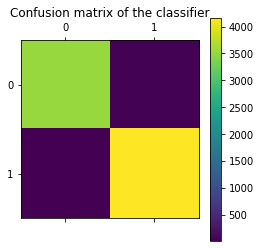

In [171]:
import pylab as pl
pl.matshow(cf)
pl.title("Confusion matrix of the classifier")
pl.colorbar()
pl.show()

Text(0.5, 1.0, 'Confusion Matrix for PassiveAggressiveClassifier')

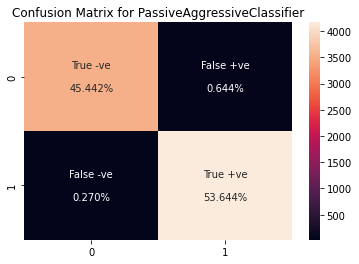

In [172]:
import matplotlib as plt
import seaborn as sns
group_names = ['True -ve', 'False +ve', 'False -ve', 'True +ve']
group_percentages = ["{0:.3%}".format(value) for value in
                    cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n\n{v2}"
          for v1,v2 in
          zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#ax = plt.axes()
ax=sns.heatmap(cf, annot = labels, fmt = '')
ax.set_title('Confusion Matrix for PassiveAggressiveClassifier')

In [173]:
print(len(tfvect.vocabulary_))
#Total no of vocabularies identified

94350


In [174]:
#Pickle in Python is primarily used in serializing and deserializing a Python object structure.
#In other words, it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.
import pickle

In [175]:
#pickle.dump(pac,open('model_1.pkl', 'wb'))-direct method
with open('model_english_pac.pkl','wb') as handle:
    pickle.dump(classifier,handle,protocol=pickle.HIGHEST_PROTOCOL)
#handle-file object returned after opening the model
#pickle.HIGHEST_PROTOCOL indicates the highest version of pickle

In [176]:
print(len(tfvect.vocabulary_))

94350


In [177]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('nbmodel', MultinomialNB())])
#multinomial naive bayes algorithm is a probabilistic learning method used in NLP

In [178]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nbmodel', MultinomialNB())])

In [179]:
score = pipeline.score(x_test, y_test)
print('Accuracy', score)
#score-returns a score or a loss

Accuracy 0.9229976822044811


In [180]:
pred = pipeline.predict(x_test)

In [181]:
print(classification_report(y_test, pred))
#to measure the quality of predictions
#precisions-measure of classifier's exactness
#recall-measure of classifier's completeness
#f1-score=weighted harmonic mean of precision and recall
#support-number of actual occurences of class in specified dataset

              precision    recall  f1-score   support

        Fake       0.95      0.88      0.91      3579
        Real       0.90      0.96      0.93      4187

    accuracy                           0.92      7766
   macro avg       0.93      0.92      0.92      7766
weighted avg       0.92      0.92      0.92      7766



In [182]:
print(len(tfvect.vocabulary_))

94350


In [183]:
print(confusion_matrix(y_test, pred))
cf_pipe= confusion_matrix(y_test, pred)

[[3140  439]
 [ 159 4028]]


Text(0.5, 1.0, 'Confusion Matrix for Pipeline Model')

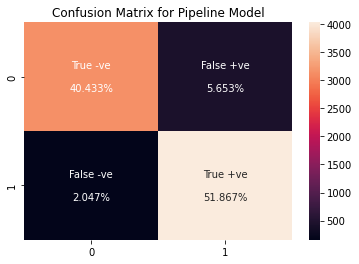

In [184]:
import seaborn as sns
import matplotlib as plt
import seaborn as sns
group_names = ['True -ve', 'False +ve', 'False -ve', 'True +ve']
group_percentages = ["{0:.3%}".format(value) for value in
                    cf_pipe.flatten()/np.sum(cf_pipe)]
labels = [f"{v1}\n\n{v2}"
          for v1,v2 in
          zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#ax = plt.axes()
ax=sns.heatmap(cf_pipe, annot = labels, fmt = '')
ax.set_title('Confusion Matrix for Pipeline Model')

In [185]:
import pickle

In [186]:
with open('model_english_pipeline.pkl','wb') as handle:
    pickle.dump(pipeline,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [187]:
#Logistic Regression, to model the probability of certain class or event existing
from sklearn.linear_model import LogisticRegression

In [188]:
LR = LogisticRegression()
LR.fit(tfid_x_train,y_train)
#fits the training dataset to the object

LogisticRegression()

In [189]:
#given a trained model it predicts the new set of data,it returns learned label of each object in an array
pred_lr=LR.predict(tfid_x_test)

In [190]:
#Returns the co-efficient of the determination of the prediction-model accuracy level
LR.score(tfid_x_test, y_test)

0.9823590007725985

In [191]:
#comparison between dataset class and predicted values
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

        Fake       0.99      0.97      0.98      3579
        Real       0.98      0.99      0.98      4187

    accuracy                           0.98      7766
   macro avg       0.98      0.98      0.98      7766
weighted avg       0.98      0.98      0.98      7766



In [192]:
print(confusion_matrix(y_test, pred_lr))

[[3480   99]
 [  38 4149]]


In [193]:
#Decision tree classification
from sklearn.tree import DecisionTreeClassifier

In [194]:
DT = DecisionTreeClassifier()
DT.fit(tfid_x_train, y_train)

DecisionTreeClassifier()

In [195]:
pred_dt = DT.predict(tfid_x_test)

In [196]:
DT.score(tfid_x_test, y_test)

0.9948493432912696

In [197]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

        Fake       0.99      1.00      0.99      3579
        Real       1.00      0.99      1.00      4187

    accuracy                           0.99      7766
   macro avg       0.99      0.99      0.99      7766
weighted avg       0.99      0.99      0.99      7766



In [198]:
print(confusion_matrix(y_test, pred_dt))

[[3563   16]
 [  24 4163]]


In [199]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [200]:
GBC = GradientBoostingClassifier(random_state=0)
#random_state=0 controls the verbosity(fact and quality of using more words than needed) while splitting and prediction
GBC.fit(tfid_x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [201]:
pred_gbc = GBC.predict(tfid_x_test)

In [202]:
GBC.score(tfid_x_test, y_test)

0.9958794746330157

In [203]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      3579
        Real       1.00      1.00      1.00      4187

    accuracy                           1.00      7766
   macro avg       1.00      1.00      1.00      7766
weighted avg       1.00      1.00      1.00      7766



In [204]:
print(confusion_matrix(y_test, pred_gbc))

[[3561   18]
 [  14 4173]]


In [205]:
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [206]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(tfid_x_train, y_train)

RandomForestClassifier(random_state=0)

In [207]:
pred_rfc = RFC.predict(tfid_x_test)

In [208]:
RFC.score(tfid_x_test, y_test)

0.984548029873809

In [209]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

        Fake       0.99      0.97      0.98      3579
        Real       0.98      1.00      0.99      4187

    accuracy                           0.98      7766
   macro avg       0.99      0.98      0.98      7766
weighted avg       0.98      0.98      0.98      7766



In [210]:
print(confusion_matrix(y_test, pred_rfc))

[[3478  101]
 [  19 4168]]


In [211]:
#Manual Testing
def output_lable(n):
    if n == "Fake":
        return "Fake News"
    elif n == "Real":
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    #creates a dataframe
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = tfvect.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_pac = classifier.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nPAC Prediction: {} ".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0]),
                                                                                                              output_lable(pred_pac[0])))

In [212]:
news = str(input())
manual_testing(news)

just making room for hillary president obama t.


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News 
PAC Prediction: Fake News 
